In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io.wavfile
import IPython

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Seeing sound!

In [34]:
# NOTE: This is only works with 1 channel (mono).  To record a mono audio sample,
# you can use this command: rec -r 44100 -c 1 -b 16 test.wav
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/vowel_ah.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

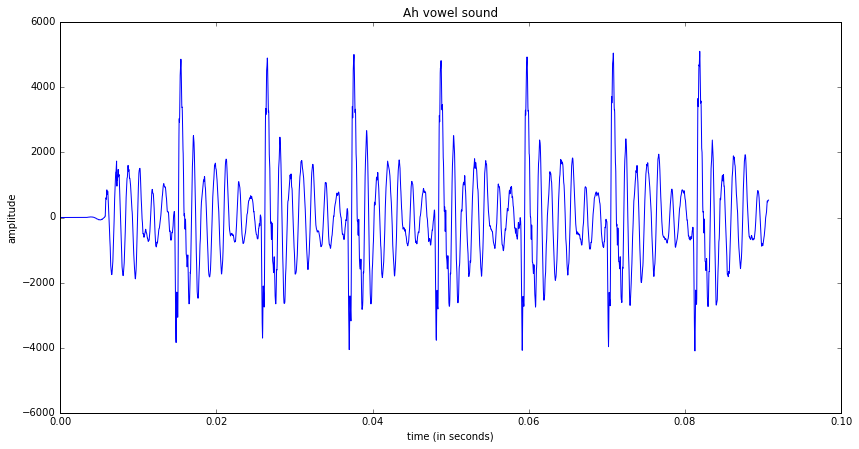

In [35]:
setup_graph(title='Ah vowel sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

In [36]:
#IPython.display.Audio("audio_files/vowel_ah.wav")

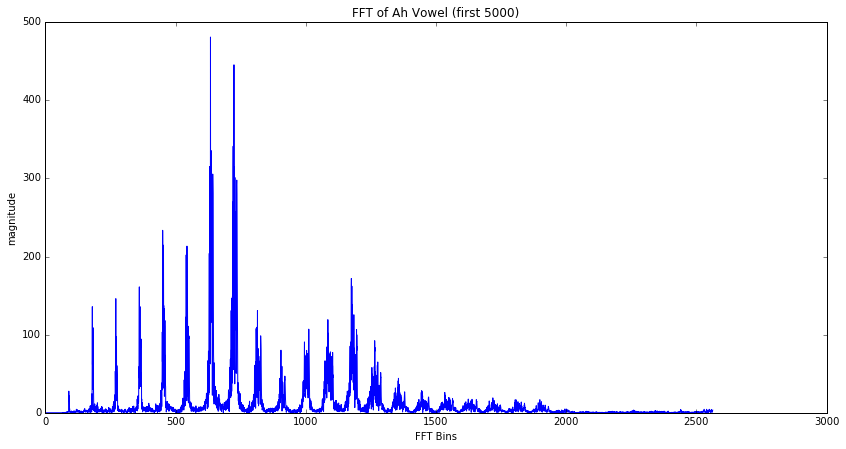

In [37]:
fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Ah Vowel (first 5000)', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:5000], fft_mag[0:5000])

## Few notes about this

* Ratio of harmonics = **timbre** = This is what makes different people's voices sound different (and different from violins)
    - Even if they are singing the same note, and the same volume
* Possible application: synthesizing new sounds (with different harmonic profiles)
    - Example: If you changed the ratio of the harmonics, you could make your voice sound like something else (Darth Vader?)

# Spectrogram (FFT over time)

### Axes

* x-axis: time
* y-axis: frequency
* z-axis (color): strength of each frequency

### See the Harmonics!

In [38]:
(doremi_sample_rate, doremi) = scipy.io.wavfile.read("audio_files/do-re-mi.wav")

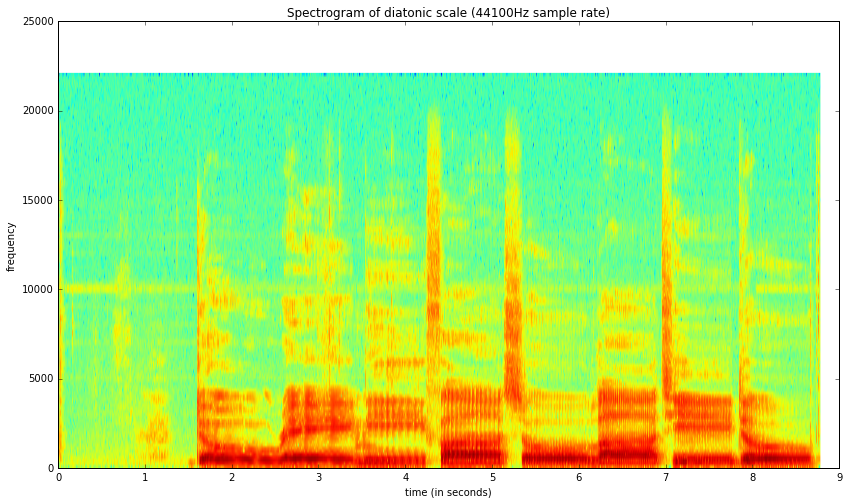

In [39]:
setup_graph(title='Spectrogram of diatonic scale (44100Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(doremi, Fs=doremi_sample_rate)

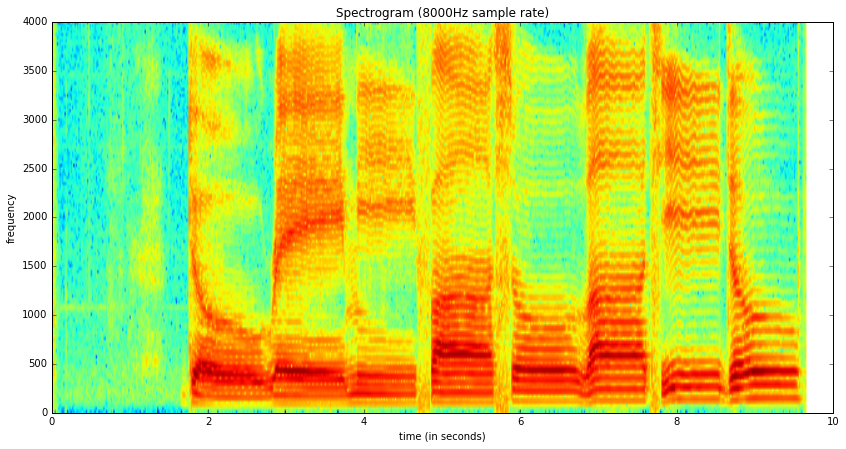

In [40]:
doremi_8000hz = [doremi[i] for i in range(0, len(doremi), 44100//8000)]
setup_graph(title='Spectrogram (8000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000)

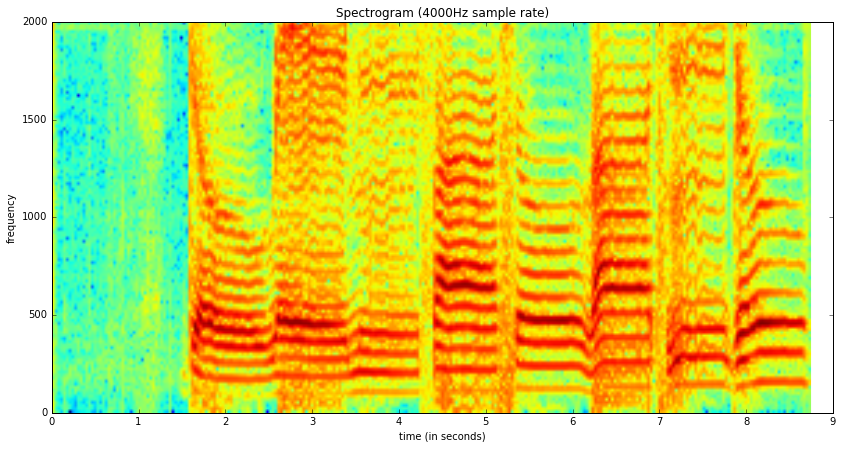

In [41]:
doremi_4000hz = [doremi[i] for i in range(0, len(doremi), 44100//4000)]
setup_graph(title='Spectrogram (4000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_4000hz, Fs=4000)

## A few things to note

* Something that sounds like a single note actually is made up of a bunch of harmonics
* Harmonics are integer multiples of the *fundamental frequency*
* Notice that the spacing between the harmonics of the first note is about double of the spacing between the harmonics in the last note (1 octave difference)

In [42]:
# Cleanup to reduce notebook size
del input_signal, time_array, rfreqs, doremi, fft_out, fft_mag, doremi_4000hz, doremi_8000hz, _